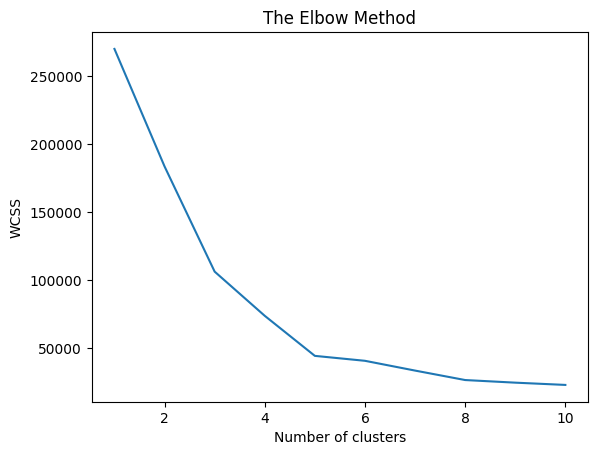

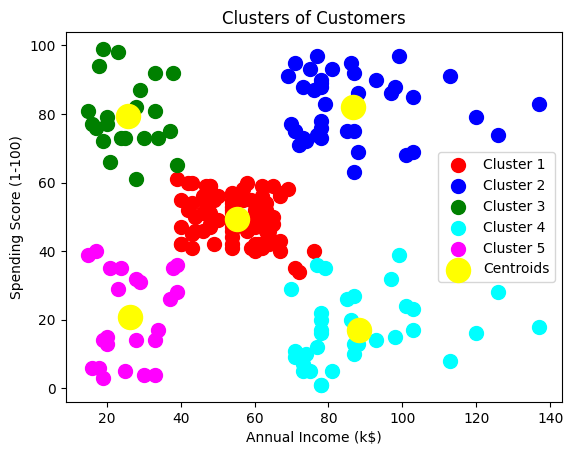

In [8]:
# KMeans clustering

# Step 1: Importing necessary libraries
import numpy as np  # Import NumPy for numerical computations and handling arrays
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs
import pandas as pd  # Import Pandas for data manipulation

# Step 2: Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')  # Load the dataset from a CSV file
X = dataset.iloc[:, [3, 4]].values  # Extract columns 3 and 4 (Annual Income & Spending Score) for clustering
# y = dataset.iloc[:, 3].values  # This line is commented out as y (target variable) is not needed for unsupervised clustering

# Step 3: (Optional) Splitting the dataset into Training and Test sets (commented out since it's not needed)
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Step 4: (Optional) Feature Scaling (commented out since we are not scaling features here)
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)  # Standardize the features (training set)
X_test = sc_X.transform(X_test)  # Standardize the features (test set)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Step 5: Using the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans  # Import the K-Means clustering algorithm
wcss = []  # Initialize an empty list to store WCSS (Within-Cluster Sum of Squares) values

# Loop through possible cluster numbers from 1 to 10
for i in range(1, 11):  # Try different numbers of clusters to find the best one
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Initialize KMeans with `i` clusters
    kmeans.fit(X)  # Fit KMeans on the dataset `X`
    wcss.append(kmeans.inertia_)  # Append the WCSS (inertia) value for the current `i` clusters

# Step 6: Plotting the elbow graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)  # Plot WCSS against number of clusters
plt.title('The Elbow Method')  # Set the title of the graph
plt.xlabel('Number of clusters')  # Label x-axis as Number of clusters
plt.ylabel('WCSS')  # Label y-axis as WCSS (Within-Cluster Sum of Squares)
plt.show()  # Display the plot

# Step 7: Fitting K-Means to the dataset with the chosen number of clusters (5 clusters here)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  # Set 5 clusters based on elbow graph analysis
y_kmeans = kmeans.fit_predict(X)  # Fit KMeans and predict the cluster labels for each data point in `X`

# Step 8: Visualizing the clusters
# Plotting each cluster with different colors and labeling the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')  # Cluster 1 points
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')  # Cluster 2 points
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')  # Cluster 3 points
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')  # Cluster 4 points
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')  # Cluster 5 points

# Plotting the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
# kmeans.cluster_centers_ stores the coordinates of the cluster centroids

# Step 9: Setting up plot details
plt.title('Clusters of Customers')  # Set the title of the plot
plt.xlabel('Annual Income (k$)')  # Label x-axis as 'Annual Income (k$)'
plt.ylabel('Spending Score (1-100)')  # Label y-axis as 'Spending Score (1-100)'
plt.legend()  # Display a legend to distinguish clusters
plt.show()  # Display the final plot with clusters and centroids


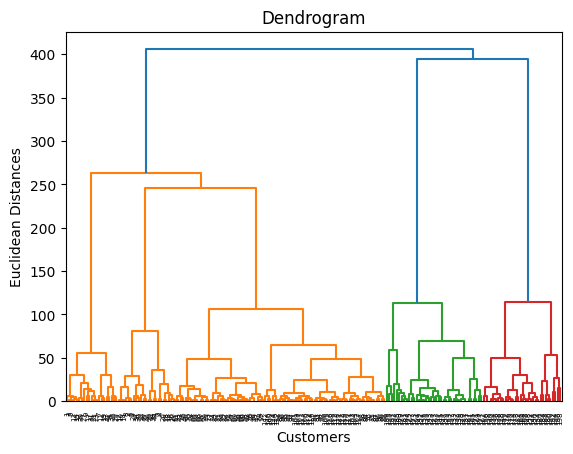

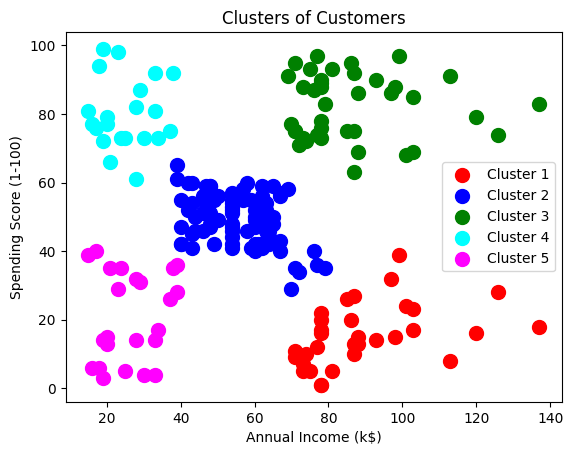

In [9]:
# Hierarchical Clustering

# Step 1: Importing the required libraries
import numpy as np  # NumPy for numerical computations
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
import pandas as pd  # Pandas for handling datasets

# Step 2: Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')  # Load the dataset from a CSV file
X = dataset.iloc[:, [3, 4]].values  # Extracting 'Annual Income' and 'Spending Score' columns as features

# Step 3: Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch  # Import hierarchical clustering module from SciPy

# Creating a dendrogram to visualize the hierarchical clustering process
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# `sch.linkage(X, method='ward')` - Computes hierarchical clusters using Ward's method
# Ward's method minimizes variance within clusters, making them more distinct
plt.title('Dendrogram')  # Title of the plot
plt.xlabel('Customers')  # X-axis label representing customers
plt.ylabel('Euclidean Distances')  # Y-axis label showing distance between clusters
plt.show()  # Display the dendrogram plot

# Step 4: Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering  # Import the clustering model

# Creating the Agglomerative Clustering model
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
# `n_clusters=5` - Specifies the number of clusters (determined from the dendrogram)
# `metric='euclidean'` - Uses Euclidean distance to measure similarity
# `linkage='ward'` - Uses Ward’s method to minimize variance within clusters

y_hc = hc.fit_predict(X)  # Fit the model to the dataset and predict cluster assignments

# Step 5: Visualizing the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')  # Cluster 1 points
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')  # Cluster 2 points
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')  # Cluster 3 points
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')  # Cluster 4 points
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')  # Cluster 5 points

# Marking the plot details
plt.title('Clusters of Customers')  # Set title of the plot
plt.xlabel('Annual Income (k$)')  # X-axis label for annual income
plt.ylabel('Spending Score (1-100)')  # Y-axis label for spending score
plt.legend()  # Display legend for the clusters
plt.show()  # Show the final visualization
